In [2]:
%matplotlib inline
from IPython.display import display, Math, Latex

import numpy as np
import matplotlib.pyplot as plt
from PIL import Image

img = Image.open('x-ray-img.png')


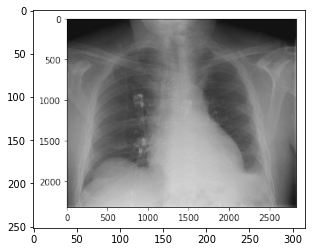

In [3]:
# display the image
plt.imshow(img, cmap='gray')


In [4]:
# convert image into a numpy array
img = np.asarray(img)


(array([2.53490e+04, 5.20000e+01, 8.70000e+01, 6.31500e+03, 1.21100e+03,
        1.09700e+03, 1.13300e+03, 1.09800e+03, 1.12600e+03, 1.10200e+03,
        1.66500e+03, 1.95100e+03, 3.75000e+03, 4.92600e+03, 5.50200e+03,
        6.43200e+03, 6.43600e+03, 5.98300e+03, 5.78700e+03, 5.83500e+03,
        6.81700e+03, 5.70000e+03, 6.26400e+03, 7.27900e+03, 6.99800e+03,
        6.96500e+03, 6.91500e+03, 6.64200e+03, 6.44900e+03, 5.67200e+03,
        5.99400e+03, 4.73100e+03, 3.82000e+03, 3.50400e+03, 3.50400e+03,
        3.62100e+03, 3.59200e+03, 3.57300e+03, 4.92800e+03, 4.90200e+03,
        4.63000e+03, 6.95000e+02, 1.92000e+02, 8.70000e+01, 1.00000e+01,
        8.00000e+00, 1.40000e+01, 1.30000e+01, 0.00000e+00, 1.17164e+05]),
 array([  0. ,   5.1,  10.2,  15.3,  20.4,  25.5,  30.6,  35.7,  40.8,
         45.9,  51. ,  56.1,  61.2,  66.3,  71.4,  76.5,  81.6,  86.7,
         91.8,  96.9, 102. , 107.1, 112.2, 117.3, 122.4, 127.5, 132.6,
        137.7, 142.8, 147.9, 153. , 158.1, 163.2, 168.3

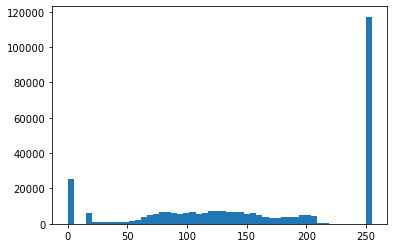

In [5]:
# put pixels in a 1D array by flattening out img array
flat = img.flatten()

# show the histogram
plt.hist(flat, bins=50)


In [6]:
# formula for creating the histogram
display(Math(r'P_x(j) = \sum_{i=0}^{j} P_x(i)'))

<IPython.core.display.Math object>

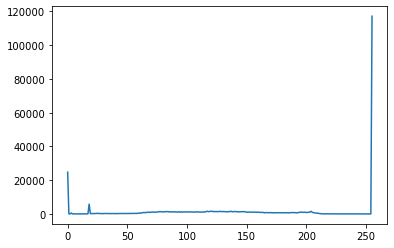

In [7]:
# create our own histogram function
def get_histogram(image, bins):
    # array with size of bins, set to zeros
    histogram = np.zeros(bins)
    
    # loop through pixels and sum up counts of pixels
    for pixel in image:
        histogram[pixel] += 1
    
    # return our final result
    return histogram

hist = get_histogram(flat, 256)

plt.plot(hist)

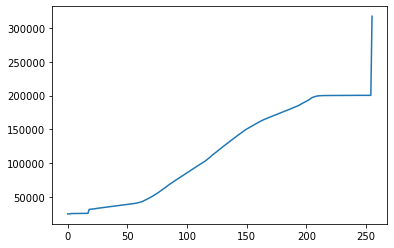

In [8]:
# create our cumulative sum function
def cumsum(a):
    a = iter(a)
    b = [next(a)]
    for i in a:
        b.append(b[-1] + i)
    return np.array(b)

# execute the fn
cs = cumsum(hist)

# display the result
plt.plot(cs)

In [9]:
# formula to calculate cumulation sum
display(Math(r's_k = \sum_{j=0}^{k} {\frac{n_j}{N}}'))


<IPython.core.display.Math object>

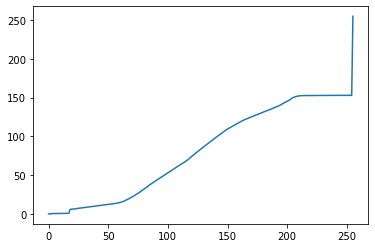

In [10]:
# re-normalize cumsum values to be between 0-255

# numerator & denomenator
nj = (cs - cs.min()) * 255
N = cs.max() - cs.min()

# re-normalize the cdf
cs = nj / N

plt.plot(cs)

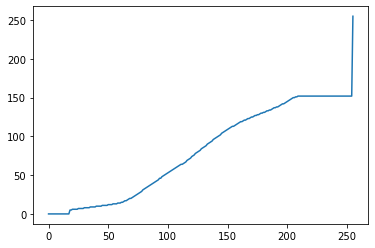

In [11]:
# cast it back to uint8 since we can't use floating point values in images
cs = cs.astype('uint8')

plt.plot(cs)


(array([ 31583.,   5648.,   5552.,   6057.,   5199.,   5064.,   6387.,
          6154.,   4645.,   5887.,   7035.,   5706.,   6630.,   5436.,
          5914.,   5513.,   5747.,   5262.,   5595.,   6627.,   6574.,
          5383.,   5930.,   6024.,   5731.,   5676.,   5788.,   6054.,
          4751.,   6808.,      0.,      0.,      0.,      0.,      0.,
             0.,      0.,      0.,      0.,      0.,      0.,      0.,
             0.,      0.,      0.,      0.,      0.,      0.,      0.,
        117160.]),
 array([  0. ,   5.1,  10.2,  15.3,  20.4,  25.5,  30.6,  35.7,  40.8,
         45.9,  51. ,  56.1,  61.2,  66.3,  71.4,  76.5,  81.6,  86.7,
         91.8,  96.9, 102. , 107.1, 112.2, 117.3, 122.4, 127.5, 132.6,
        137.7, 142.8, 147.9, 153. , 158.1, 163.2, 168.3, 173.4, 178.5,
        183.6, 188.7, 193.8, 198.9, 204. , 209.1, 214.2, 219.3, 224.4,
        229.5, 234.6, 239.7, 244.8, 249.9, 255. ]),
 <BarContainer object of 50 artists>)

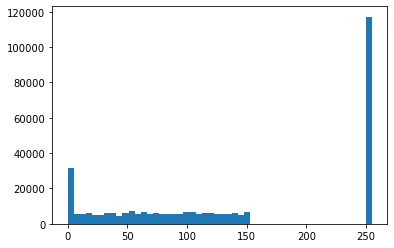

In [12]:
# get the value from cumulative sum for every index in flat, and set that as img_new
img_new = cs[flat]

# we see a much more evenly distributed histogram
plt.hist(img_new, bins=50)


In [13]:
# put array back into original shape since we flattened it
img_new = np.reshape(img_new, img.shape)
img_new


array([[[255, 255, 255,   0],
        [255, 255, 255,   0],
        [255, 255, 255,   0],
        ...,
        [255, 255, 255,   0],
        [255, 255, 255,   0],
        [255, 255, 255,   0]],

       [[255, 255, 255,   0],
        [255, 255, 255,   0],
        [255, 255, 255,   0],
        ...,
        [255, 255, 255,   0],
        [255, 255, 255,   0],
        [255, 255, 255,   0]],

       [[255, 255, 255,   0],
        [255, 255, 255,   0],
        [255, 255, 255,   0],
        ...,
        [255, 255, 255,   0],
        [255, 255, 255,   0],
        [255, 255, 255,   0]],

       ...,

       [[255, 255, 255,   0],
        [255, 255, 255,   0],
        [255, 255, 255,   0],
        ...,
        [255, 255, 255,   0],
        [255, 255, 255,   0],
        [255, 255, 255,   0]],

       [[255, 255, 255,   0],
        [255, 255, 255,   0],
        [255, 255, 255,   0],
        ...,
        [255, 255, 255,   0],
        [255, 255, 255,   0],
        [255, 255, 255,   0]],

       [[255

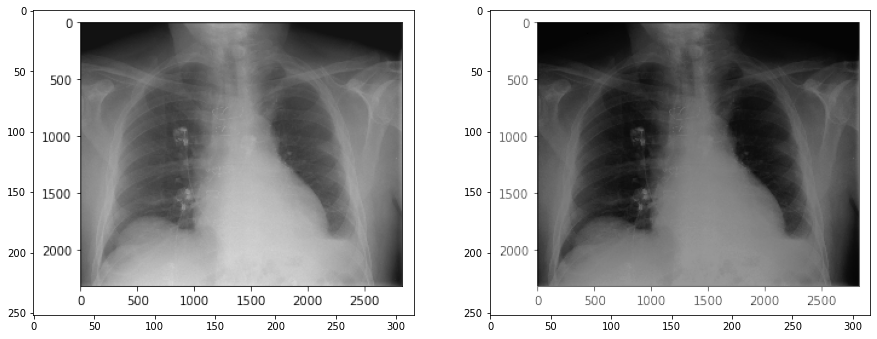

In [22]:
# set up side-by-side image display
fig = plt.figure()
fig.set_figheight(15)
fig.set_figwidth(15)

fig.add_subplot(1,2,1)
plt.imshow(img, cmap='gray')

# display the new image
fig.add_subplot(1,2,2)
plt.imshow(img_new, cmap='gray')

plt.show(block=True)
